In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

# Probability and Stochastic Processes 2024-25: **Problem Set 2**

Provide a solution to the following exercises.

Some rules:

- You should **use the libraries that we have seen** during our tutorials.

- You might need some formulas (theorems, definitions, properties...) coming from our lectures. Whenever your solution is backed up by a formula, write a comment citing it.

- **Comment** the code explaining the passages that you followed using the # command in the code cell. Code comments are for short explanations. If you want to write a "text-heavy" answer, then I suggest you use a markdown cell.

- The output of your code should solely be the answers to the questions (this means that you should not print extra things or plots). In general, **be tidy**!

- Before you submit the notebook, be sure to **compile it** (i.e., you should run all the code before downloading your notebook, so that I can see your output and do not have to re-run it).

- You cannot hand-in the exact same solutions of a classmate of yours, or directly copy and paste from an AI. The PS is individual, so you need to put your own work in there.

# 1 - Convergence of random variables

Since you are now a keen probabilist, you want to test your understanding of convergence of random variables. Consider the vector $(X_n, Y)$ whose joint pdf is
$$f(x, y) =  n e^{-y}\qquad\text{ for }y\in\mathbb{R}_+, x\in\left(y, y+\frac{1}{n}\right)$$

1. Design an experiment to understand if $X_n$ converges to $Y$ in probability and in mean square. Consider values of $n$ which range from 1 to 200. For the convergence in probability, check for values of $\epsilon = 10^{-1}, 10^{-2}, 10^{-3}$. The output of this exeperiment should be 4 graphs (one for mean square and three for probability) where the $x$ axis represents $n$, and the $y$ axis represents the respective convergence measure. Do you think $X_n$ converge to $Y$ in probability and in mean square (comment briefly, no need to prove it theorethically - unless you want to try)? [max 5 points]

2. What can you say about convergence in distribution? No need to code/plot anything, just answer theoretically. [2]

3. Fix a value of $n$ (we can call it $n^*$) and consider $X = X_{n^*}$. Design an experiment that allows you to plot the empirical density of:
    
    - $\sum_{i=1}^{1000} X_i$, where $X_i$ are iid copies of $X$

    - $\sum_{i=1}^{10} X_i$, where $X_i$ are iid copies of $X$

    What can you say about the difference of these two distributions? Comment briefly. [2]

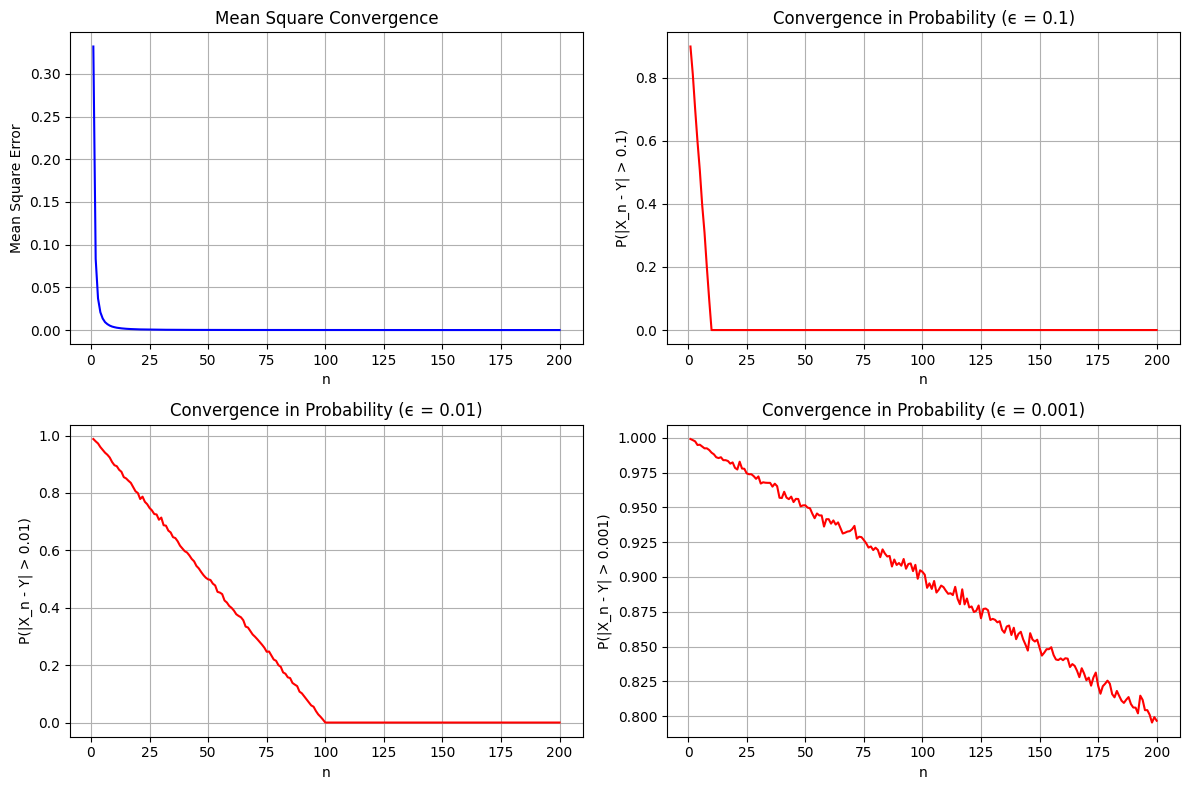

In [36]:
# 1.1 Empirical convergence in mean square and probability

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon, uniform

# Set the n values and the number of samples
n_values = np.arange(1, 201)
# print(n_values)
num_samples = 10000

# Store results
mean_square_errors = []  # Mean square error for convergence in L2
probabilities_eps = {1e-1: [], 1e-2: [], 1e-3: []}  # Dictionary for convergence in probability values

# For each n, Xn is uniformly distributed between y ("loc" on Scipy) and y + 1/n ("scale")
# Y, instead, follows an exponential distribution with scale lambda = 1, multiplied by n

# Loop through each n
for n in n_values:
    # Generate Y ~ Exponential(n) => scale = 1/n
    Y = n*expon.rvs(scale=1, size=num_samples)
    # print(Y)
    # Generate X_n ~ Uniform(Y, Y + 1/n)
    X_n = uniform.rvs(loc=Y, scale=1/n, size=num_samples)
    # print(X_n)
    # Compute and store Mean Square Error
    mse = np.mean((X_n - Y) ** 2)
    mean_square_errors.append(mse)

    # Convergence in Probability
    # check how many times difference between Xn and Y is below the threshold
    for eps in probabilities_eps.keys():
        prob = np.mean(np.abs(X_n - Y) > eps)
        probabilities_eps[eps].append(prob)

# print(mean_square_errors)
# Plot Results
plt.figure(figsize=(12, 8))

# Mean Square Error plot
plt.subplot(2, 2, 1) # creates the subplot where the results are plotted
plt.plot(n_values, mean_square_errors, color='b')
plt.title("Mean Square Convergence")
plt.xlabel("n")
plt.ylabel("Mean Square Error")
plt.grid()

# Convergence in Probability for different epsilons plots
# enumerate function used to loop over the dictionary
for i, (eps, probs) in enumerate(probabilities_eps.items()):
    plt.subplot(2, 2, i + 2) # creates the subplot where the results are plotted
    plt.plot(n_values, probs, color='r')
    plt.title(f"Convergence in Probability (ϵ = {eps})")
    plt.xlabel("n")
    plt.ylabel(f"P(|X_n - Y| > {eps})")
    plt.grid()

plt.tight_layout()
plt.show()

According to the plot, we can say that the distribution converges both in mean square and probability. It would only be a matter of higher n value to see P going also below 0.001 all times

# 1.2 Mean square, probability, and distribution convergence

From probability theory, we know that mean square convergence is stronger (and therefore implies) than probability convergence (Theorem 8.14); and the same holds between convergence in probability and convergence in distribution (Theorem 8.46). Therefore, once our experiment gives us confidence that X_n converges to Y in mean square, we can be confident about probability and distribution convergence as well.

range(0, 10)
10000
10000
[436.44170876 501.21498452 859.25938594 ... 582.02964624 677.12853485
 670.02355574]


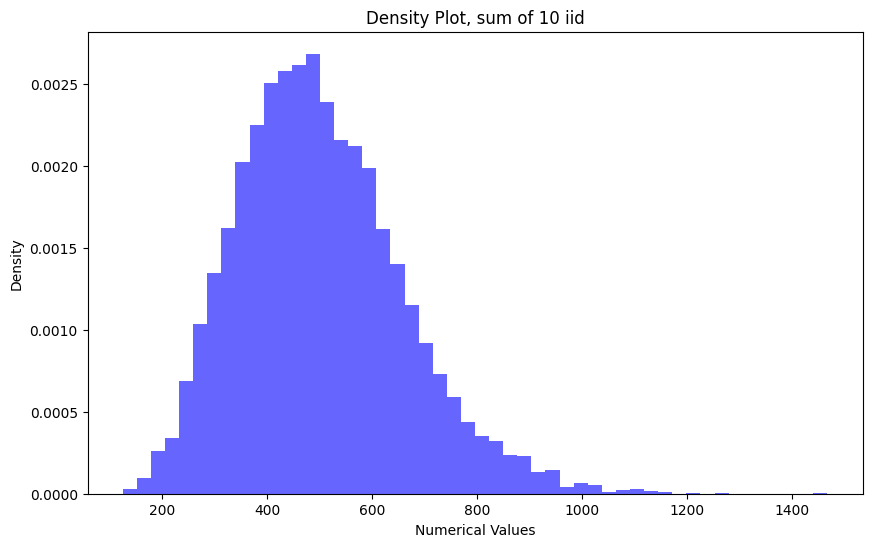

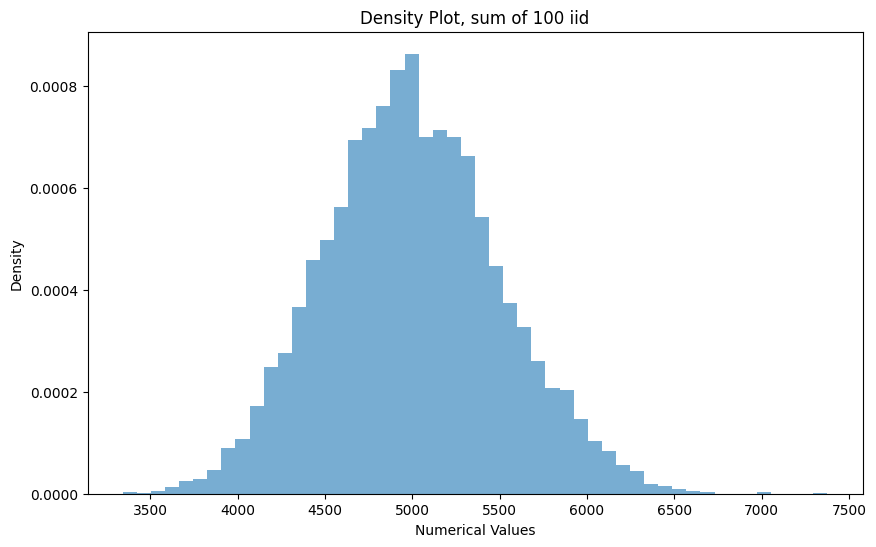

Comments:
We see the sum of 100 copies to be much smoother and closely approximates a normal distribution.
The sum of 10 copies should show more variability and less smoothness because fewer samples contribute to the sum.
The Central Limit Theorem 8.25 explains this behavior: as the number of summands increases, the distribution approaches normality.
It is reasonable to assume that the distribution sum for 1000 iid variables would be even closer to a Gaussian


In [48]:
# 1.3 some of iid X_n

# Fix the value of n*
n_star = 50  # You can experiment with other values
num_samples_1000 = 1000  # Number of summands for the first sum
num_samples_10 = 10  # Number of summands for the second sum
num_experiments = 10000 # Number of experiments to approximate the density

# Generate the base random variable X = X_n*
# Step 1: Generate Y ~ n_star * Exponential(1)
Y = n_star * expon.rvs(scale=1, size=(num_experiments))

# Step 2: Generate X ~ Uniform(Y, Y + 1/n_star)
X = uniform.rvs(loc=Y, scale=1/n_star, size=(num_experiments))
X_n_10 = np.zeros(num_experiments)
X_n_1000 = np.zeros(num_experiments)

# Experiment 1: Sum of 10 independent copies of X
for i in range(num_experiments):
  X_n_sum = 0
  for j in range(num_samples_10):
      Y = n_star*expon.rvs(scale=1) # Generate Y
      X_n_j = uniform.rvs(Y, scale=1/n_star, size=1) # Generate X
      X_n_j = X_n_j[0] # Conversion to a scalar
      X_n_sum = X_n_sum + X_n_j # Sum of the samples
  # Double for loop so that generated X_n are truly iid
  X_n_10[i] = X_n_sum

# Experiment 2: Sum of 1000 independent copies of X
# I had to reduce to 100 because Colab was doing this very slowly
for i in range(num_experiments):
  X_n_sum = 0
  for j in range(100): # Reduced because of backend slowness
      Y = n_star*expon.rvs() # Generate Y, I can specify no parameter in this case
      X_n_j = uniform.rvs(Y, scale=1/n_star, size=1) # Generate X
      X_n_j = X_n_j[0] # Conversion to a scalar
      X_n_sum = X_n_sum + X_n_j # Sum of the samples
  # Double for loop so that generated X_n are truly iid
  X_n_1000[i] = X_n_sum

print(range(num_samples_10))
print(len(X_n_1000)) # 10000 experiments of sum of 1000 iid
print(len(X_n_10)) # 10000 experiments of sum of 10 iid
print(X_n_10)
# print(min(X_n_10), max(X_n_10))
# print(min(X_n_1000), max(X_n_1000))

# For plotting of density function we straightly use plt.his

# Plot the density of sum 10 experiment
plt.figure(figsize=(10, 6))
plt.hist(X_n_10, bins=50, density=True, alpha=0.6, color='b')
plt.xlabel('Numerical Values')
plt.ylabel('Density')
plt.title('Density Plot, sum of 10 iid')
plt.show()

# Plot the density of sum 100 experiment
plt.figure(figsize=(10, 6))
plt.hist(X_n_1000, bins=50, density=True, alpha=0.6)
plt.xlabel('Numerical Values')
plt.ylabel('Density')
plt.title('Density Plot, sum of 100 iid')
plt.show()

# Comments about the difference
print("Comments:")
print("We see the sum of 100 copies to be much smoother and closely approximates a normal distribution.")
print("The sum of 10 copies should show more variability and less smoothness because fewer samples contribute to the sum.")
print("The Central Limit Theorem 8.25 explains this behavior: as the number of summands increases, the distribution approaches normality.")
print("It is reasonable to assume that the distribution sum for 1000 iid variables would be even closer to a Gaussian")

# 2 - S&P Credit ratings

Each year, Standard and Poor’s (S&P) publishes the matrix of transition probabilities of credit ratings over the different markets (they actually do: https://www.spglobal.com/ratings/en/research/articles/240328-default-transition-and-recovery-2023-annual-global-corporate-default-and-rating-transition-study-13047827). Load the three matrices representing the estimated transition probabilities for 2023 of the European Union, United States and emerging and frontier markets. The first 7 columns are the different ratings, while "D" means default and "NR" not rated.

1. How many classes are in each chain, and are they closed? Are there absorbing states? [3]

2. What is the probability that an agency rated BBB defaults in the incoming 3 years, for each of the three different markets? [3]

3. Assume homogeneity of the model, that no new agency is rated and that the agencies are uniformly distributed at the start. In 10 and 30 years, which percentage of the agencies in each market will be classified with a category higher than or equal to A? And which percentage will be defaulting? [3]

In [41]:
# 2.1 Classes and absorbing states
import pandas as pd
import numpy as np
from scipy.sparse.csgraph import connected_components
from scipy.sparse import csr_matrix

tcs_EU = pd.read_excel('transition_credit_scores_EU.xlsx', header=0, index_col=0)
tcs_US = pd.read_excel('transition_credit_scores_US.xlsx', header=0, index_col=0)
tcs_EM = pd.read_excel('transition_credit_scores_emerging.xlsx', header=0, index_col=0)
print(tcs_EU)
print(tcs_US)
print(tcs_EM)
states = tcs_EU.columns.tolist() # First column contains state labels (for all)
print(states)
ls = len(states) # This is the number of states

# Step 1: Convert DataFrame to a NumPy array
tEU_matrix = tcs_EU.to_numpy()
tUS_matrix = tcs_US.to_numpy()
tEM_matrix = tcs_EM.to_numpy()

# Step 2: Build a graph representation
# Treat any positive entry in the transition matrix as a directed edge
graphEU = (tEU_matrix > 0).astype(int)
graphUS = (tUS_matrix > 0).astype(int)
graphEM = (tEM_matrix > 0).astype(int)

# Step 3: Find strongly connected components (SCCs)
# These represent the classes in the Markov chain
# To do that, we use scipy function connected_components
n_classesEU, labelsEU = connected_components(csgraph=csr_matrix(graphEU), connection='strong')
print("There are ", n_classesEU, "EU classes")
n_classesUS, labelsUS = connected_components(csgraph=csr_matrix(graphUS), connection='strong')
print("There are ", n_classesUS, "US classes")
n_classesEM, labelsEM = connected_components(csgraph=csr_matrix(graphEM), connection='strong')
print("There are ", n_classesEM, "EM classes")

# Step 4: Check if each class is closed
# A class is closed if no state within it transitions to a state outside the class
classesEU = {i: [] for i in range(n_classesEU)} # Dictionary
classesUS = {i: [] for i in range(n_classesUS)}
classesEM = {i: [] for i in range(n_classesEM)}
for stateEU, labelEU in enumerate(labelsEU):
    classesEU[labelEU].append(stateEU)
for stateUS, labelUS in enumerate(labelsUS):
    classesUS[labelUS].append(stateUS)
for stateEM, labelsEM in enumerate(labelsEM):
    classesEM[labelsEM].append(stateEM)

is_closed_EU = []
is_closed_US = []
is_closed_EM = []

for class_label_EU, states_EU in classesEU.items():
    # Extract submatrix for the current class
    submatrix_EU = tEU_matrix[np.ix_(states_EU, states_EU)]
    outgoing_transitions_EU = tEU_matrix[states_EU, :].sum(axis=1) - submatrix_EU.sum(axis=1)
    is_closed_EU.append(np.all(outgoing_transitions_EU == 0))
for class_label_US, states_US in classesUS.items():
  submatrix_US = tUS_matrix[np.ix_(states_US, states_US)]
  outgoing_transitions_US = tUS_matrix[states_US, :].sum(axis=1) - submatrix_US.sum(axis=1)
  is_closed_US.append(np.all(outgoing_transitions_EU == 0))
for class_label_EM, states_EM in classesEM.items():
  submatrix_EM = tEM_matrix[np.ix_(states_EM, states_EM)]
  outgoing_transitions_EM = tEM_matrix[states_EM, :].sum(axis=1) - submatrix_EM.sum(axis=1)
  is_closed_EM.append(np.all(outgoing_transitions_EU == 0))

# Step 5: Identify absorbing states
# A state is absorbing if it only transitions to itself
absorbing_states_EU = []
absorbing_states_US = []
absorbing_states_EM = []
for state in range(tEU_matrix.shape[0]):
    if tEU_matrix[state, state] == 1.0 and np.sum(tEU_matrix[state, :]) == 1.0:
        absorbing_states_EU.append(state)
for state in range(tUS_matrix.shape[0]):
    if tUS_matrix[state, state] == 1.0 and np.sum(tUS_matrix[state, :]) == 1.0:
        absorbing_states_US.append(state)
for state in range(tEM_matrix.shape[0]):
    if tEM_matrix[state, state] == 1.0 and np.sum(tEM_matrix[state, :]) == 1.0:
        absorbing_states_EM.append(state)

# ratings = ["AAA", "AA", "A", "BBB", "BB", "B", "CCC/C", "D", "NR"]
ratings = states
# Conversion back to the right classes names
# Only for EU, unfortunately I didn't have enough time!
keys_array = list(classesEU.values())
print("EU classes are ", keys_array)
class_arr = np.zeros(len(keys_array))
#for i in range(len(keys_array)):
#print(class_arr[0])
Class_1 = list(keys_array[0])
Class_2 = list(keys_array[1])
Class_3 = list(keys_array[2])
Class_4 = list(keys_array[3])
#print("Class_1")
#print(ratings[Class_1[0]])
Class_1 = ratings[Class_1[0]]
#print("Class_2")
#print(ratings[Class_2[0]])
Class_2 = ratings[Class_2[0]]
#print("Class_3")
#print(ratings[Class_3[0]])
Class_3 = ratings[Class_3[0]]
#print("Class_4")
Class_4 = [ratings[i] for i in Class_4]
#print(Class_4)
Classes = [Class_1, Class_2, Class_3, Class_4]

# Step 6: Display results
print("Number of classes:", n_classesEU)
print("EU Classes:", Classes)
keys_array_US = list(classesUS.values())
print("US classes are (columns)", keys_array_US)
keys_array_EM = list(classesEM.values())
print("EM classes are (columns)", keys_array_EM)

print("Is each EU class closed?:", is_closed_EU)
print("Is each US class closed?:", is_closed_US)
print("Is each EM class closed?:", is_closed_EM)
print("EU Absorbing states:", absorbing_states_EU)
print("US Absorbing states:", absorbing_states_US)
print("EM Absorbing states:", absorbing_states_EM)

# Output explanation:
# - Number of classes: Total number of strongly connected components.
# - Classes: Lists of states in each class.
# - Is each class closed?: A list of booleans indicating if each class is closed.
# - Absorbing states: A list of states that are absorbing (if any).


       AAA      AA       A     BBB      BB       B   CCC/C       D      NR
AAA      1  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
AA       0  0.9494  0.0253  0.0000  0.0000  0.0000  0.0000  0.0000  0.0253
A        0  0.0051  0.9591  0.0077  0.0000  0.0000  0.0000  0.0000  0.0281
BBB      0  0.0000  0.0337  0.9035  0.0067  0.0045  0.0022  0.0000  0.0494
BB       0  0.0000  0.0000  0.0888  0.8084  0.0327  0.0047  0.0000  0.0654
B        0  0.0000  0.0000  0.0000  0.0375  0.7896  0.0500  0.0104  0.1125
CCC/C    0  0.0000  0.0000  0.0000  0.0000  0.1200  0.4000  0.2933  0.1867
D        0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  1.0000  0.0000
NR       0  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  1.0000
       AAA     AA       A     BBB      BB       B   CCC/C       D      NR
AAA      1  0.000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000  0.0000
AA       0  0.958  0.0168  0.0000  0.0000  0.0000  0.0000  0.0000  0.0252
A        0  0.000  0.9666  0

In [49]:
# 2.2 Failure probability
# Compute the transition matrix raised to the power of 3 (3 years)
bbb_index = 3
default_index = 7
P_3_years_EU = np.linalg.matrix_power(tcs_EU, 3)
P_3_years_US = np.linalg.matrix_power(tcs_US, 3)
P_3_years_EM = np.linalg.matrix_power(tcs_EM, 3)
# Probability of default in 3 years starting from BBB
# That's why, with the power raise of the matrix,
# P_3 is the transition for a time step of three years
# Then, at position (BBB, D) I find the probability of this transition in 3 years
probability_default_3_years_EU = P_3_years_EU[bbb_index, default_index]
probability_default_3_years_US = P_3_years_US[bbb_index, default_index]
probability_default_3_years_EM = P_3_years_EM[bbb_index, default_index]

print("The Probability of default in 3 years in EU given BBB is:", probability_default_3_years_EU)
print("The Probability of default in 3 years in US given BBB is:", probability_default_3_years_US)
print("The Probability of default in 3 years in EM given BBB is:", probability_default_3_years_EM)

The Probability of default in 3 years in EU given BBB is: 0.0016926461430000002
The Probability of default in 3 years in US given BBB is: 0.009036706618
The Probability of default in 3 years in EM given BBB is: 0.00026773577099999997


In [50]:
# 2.3 High rating in the future
# First of all, given conditions mean that P will stay the same

# Compute the 10-year and 30-year transition matrix
ten_year_matrix_EU = np.linalg.matrix_power(tEU_matrix, 10)
ten_year_matrix_US = np.linalg.matrix_power(tUS_matrix, 10)
ten_year_matrix_EM = np.linalg.matrix_power(tEM_matrix, 10)
thirty_year_matrix_EU = np.linalg.matrix_power(tEU_matrix, 30)
thirty_year_matrix_US = np.linalg.matrix_power(tUS_matrix, 30)
thirty_year_matrix_EM = np.linalg.matrix_power(tEM_matrix, 30)
# Assume an initial uniform distribution of agencies across all states
initial_distribution = np.ones(ls) / ls  # Equal probability for all states
# This holds true for all markets

# Calculate the distribution after 10 and 30 years with dot product
# See 12.4 and 12.19 of theory book
distribution_10_years_EU = np.dot(initial_distribution, ten_year_matrix_EU)
distribution_10_years_US = np.dot(initial_distribution, ten_year_matrix_US)
distribution_10_years_EM = np.dot(initial_distribution, ten_year_matrix_EM)
distribution_30_years_EU = np.dot(initial_distribution, thirty_year_matrix_EU)
distribution_30_years_US = np.dot(initial_distribution, thirty_year_matrix_US)
distribution_30_years_EM = np.dot(initial_distribution, thirty_year_matrix_EM)

# Now, the categories which interest us are rating >A and default
print(states)
# I can see, they are respectively first three columns and eight one
good_grades = [0, 1, 2]
bad_grades = 7

# Compute percentages
percent_high_grade_EU10 = sum(distribution_10_years_EU[i] for i in good_grades) * 100
percent_defaulting_EU10 = distribution_10_years_EU[bad_grades] * 100
percent_high_grade_US10 = sum(distribution_10_years_US[i] for i in good_grades) * 100
percent_defaulting_US10 = distribution_10_years_US[bad_grades] * 100
percent_high_grade_EM10 = sum(distribution_10_years_EM[i] for i in good_grades) * 100
percent_defaulting_EM10 = distribution_10_years_EM[bad_grades] * 100
percent_high_grade_EU30 = sum(distribution_30_years_EU[i] for i in good_grades) * 100
percent_defaulting_EU30 = distribution_30_years_EU[bad_grades] * 100
percent_high_grade_US30 = sum(distribution_30_years_US[i] for i in good_grades) * 100
percent_defaulting_US30 = distribution_30_years_US[bad_grades] * 100
percent_high_grade_EM30 = sum(distribution_30_years_EM[i] for i in good_grades) * 100
percent_defaulting_EM30 = distribution_30_years_EM[bad_grades] * 100
print("Percentage of EU institutions with good ratings in 10 years: ", percent_high_grade_EU10, "%")
print("Percentage of US institutions with good ratings in 10 years: ", percent_high_grade_US10, "%")
print("Percentage of EM institutions with good ratings in 10 years: ", percent_high_grade_EM10, "%")
print("Percentage of EU institutions defaulting in 10 years: ", percent_defaulting_EU10, "%")
print("Percentage of US institutions defaulting in 10 years: ", percent_defaulting_US10, "%")
print("Percentage of EM institutions defaulting in 10 years: ", percent_defaulting_EM10, "%")
print("Percentage of EU institutions with good ratings in 30 years: ", percent_high_grade_EU30, "%")
print("Percentage of US institutions with good ratings in 30 years: ", percent_high_grade_US30, "%")
print("Percentage of EM institutions with good ratings in 30 years: ", percent_high_grade_EM30, "%")
print("Percentage of EU institutions defaulting in 30 years: ", percent_defaulting_EU30, "%")
print("Percentage of US institutions defaulting in 30 years: ", percent_defaulting_US30, "%")
print("Percentage of EM institutions defaulting in 30 years: ", percent_defaulting_EM30, "%")


['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC/C', 'D', 'NR']
Percentage of EU institutions with good ratings in 10 years:  30.19996800576082 %
Percentage of US institutions with good ratings in 10 years:  28.31261219792811 %
Percentage of EM institutions with good ratings in 10 years:  20.971480706487178 %
Percentage of EU institutions defaulting in 10 years:  18.947209477402144 %
Percentage of US institutions defaulting in 10 years:  22.072400213795884 %
Percentage of EM institutions defaulting in 10 years:  19.210073005733864 %
Percentage of EU institutions with good ratings in 30 years:  23.112035176749263 %
Percentage of US institutions with good ratings in 30 years:  21.189465420447295 %
Percentage of EM institutions with good ratings in 30 years:  18.487817240622462 %
Percentage of EU institutions defaulting in 30 years:  19.83811399425465 %
Percentage of US institutions defaulting in 30 years:  24.597630958408303 %
Percentage of EM institutions defaulting in 30 years:  20.4962978163

# 3 - Card shuffling
You have a deck of 52 cards and want to shuffle them well. You mathe-magician friend has told you that a decent method of shuffling would be, at each iteration of the shuffling, to pick the top card of the deck and place it in one of the 52 positions of the deck uniformly at random.

1. Shuffling this deck of cards can be modeled as a stochastic process. What is the state space of the process, and its cardinality? Is it Markovian? [1]

2. On average, how many times do you have to shuffle the deck to get the original bottom card (i.e. the card that was at the bettom before you started shuffling) to come to the top? (answer running simulations) [4]

3. Let us now focus on the top card (similarly, we are talking about the card at the top of the deck before this is shuffled). What is the distribution of the position of this card, after the bottom card has reached the top? Plot its empirical probability mass function after running some simulations. [2]

4. Your friend has told you that a good way to get the deck shuffled is to keep track of when the original bottom card of the deck ends up at the top of the shuffled deck. Once this happens, you shuffle once more according to the rule, and then you stop. Are they telling the truth? (do not run any simulations, answer with text) [2]

# 3.1 Shuffling stochastic process generalities

State Space is the state of the system at any time. In this case, it is the current ordering of the deck. Since a standard deck of 52 cards has 52! unique permutations,the state space is the set of all possible permutations of the 52 cards. Therefore, the cardinality of the state space is 52!, which is approximately 8.0658×10^(67)

Now, is the Process Markovian?
A Markov process satisfies the Markov property: the future state depends only on the current state and not on the sequence of states that preceded it (definition 12.1). In this shuffling method the probability of the next state (deck arrangement after one iteration) depends only on the current state of the deck (its current ordering). In fact the placement of the top card is uniformly random, and once it is inserted, the new arrangement becomes the current state for the next step. So the evolution of the deck's arrangement depends solely on its current configuration and not on how it arrived at that configuration, and therefore

# YES THE PROCESS IS MARKOVIAN

Average number of shuffles required:  231.594


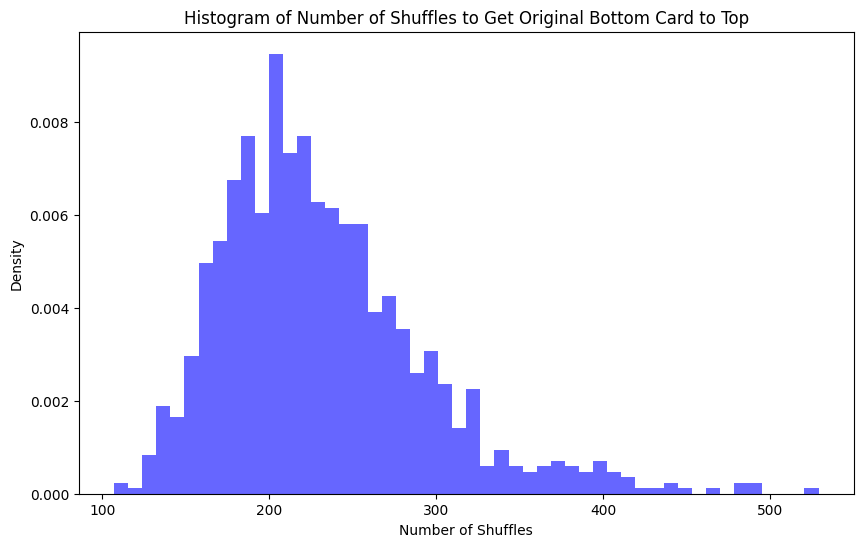

In [45]:
# 3.2 Shuffling simulation - Average Shuffles to Move Original Bottom Card to Top

# I prefer to do a new import at the beginning every exercise
# Just so it is clear what is needed for the exercise
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import random

def simulate_shuffles_to_top(num_simulations=1000):
    # This simulates the average number of shuffles required to move the original bottom card to the top.
    # The only needed argument is the number of simulations to perform.
    # It returns a float, representing the average number of shuffles.
    num_shuffles_list = []

    for i in range(num_simulations):
        # Initialize deck
        deck = list(range(52))  # Represent cards by indices 0 to 51
        original_bottom_card = deck[-1]  # Number for the bottom card initially

        num_shuffles = 0

        while True:
            num_shuffles += 1
            # Perform one shuffle: pick top card and place it randomly
            top_card = deck.pop(0)
            insert_position = random.randint(0, 51)  # Random position in deck
            # Alternatively, we could have used scipy.uniform
            deck.insert(insert_position, top_card) # Put the card in said position

            # Check if the original bottom card is now at the top to stop shuffling
            if deck[0] == original_bottom_card:
                break

        num_shuffles_list.append(num_shuffles)

    return num_shuffles_list

# Perform simulation
average_shuffles = simulate_shuffles_to_top(num_simulations=1000)
print("Average number of shuffles required: ", np.mean(average_shuffles))

# Even if not strictly requested, I find it helpful to plot the histogram
# Plot the histogram of the experimental density function
plt.figure(figsize=(10, 6))
plt.hist(average_shuffles, bins=50, density=True, alpha=0.6, color='b')
plt.xlabel('Number of Shuffles')
plt.ylabel('Density')
plt.title('Histogram of Number of Shuffles to Get Original Bottom Card to Top')
plt.show()

# Executing the code multiple time, the average number of shuffles
# stays between 230 and 240 times

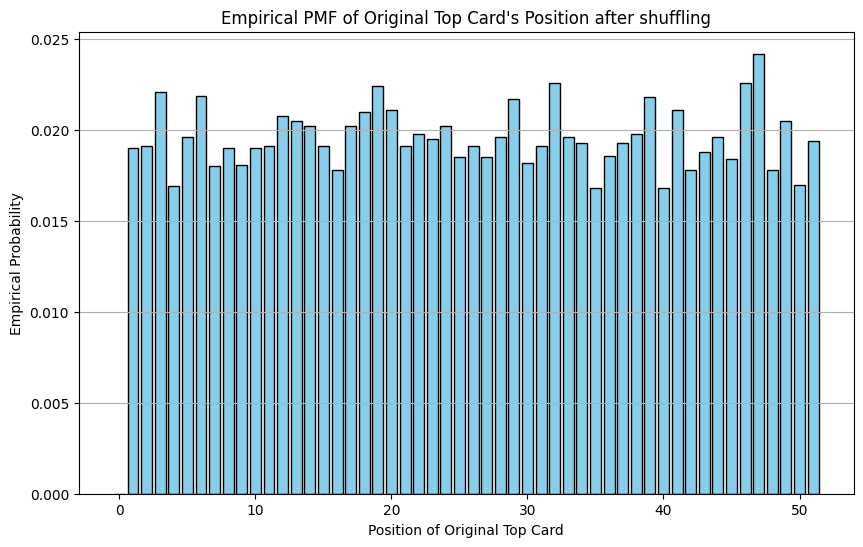

In [46]:
# 3.3 Top card PMF

# New Simulation: Empirical PMF of the Original Top Card's Position
def simulate_top_card_position(num_simulations=10000):
# This simulates the distribution of the position of the original top card
# after the original bottom card reaches the top.
# The only argumenti is the number of simulations to perform.
# It returns the empirical counts of the positions of the original top card.
    position_counts = np.zeros(52)
    for _ in range(num_simulations):
        # Initialize deck
        deck = list(range(52))  # Represent cards by indices 0 to 51
        original_bottom_card = deck[-1]  # Bottom card initially
        original_top_card = deck[0]  # Top card initially

        # Shuffle until the original bottom card is at the top
        while True:
            # Perform one shuffle: pick top card and place it randomly
            top_card = deck.pop(0)
            insert_position = random.randint(0, 51) # Uniform random choice
            deck.insert(insert_position, top_card) # Insertion at random

            # Check if the original bottom card is now at the top
            if deck[0] == original_bottom_card:
                break

        # Record the position of the original top card
        position = deck.index(original_top_card) # Find the index
        position_counts[position] += 1 # Store the instance of the result

    return position_counts / num_simulations # Final vector made as percentage

# Perform simulation
empirical_pmf = simulate_top_card_position(num_simulations=10000)

# Plot the empirical PMF
plt.figure(figsize=(10, 6))
plt.bar(range(52), empirical_pmf, color="skyblue", edgecolor="black")
plt.xlabel("Position of Original Top Card")
plt.ylabel("Empirical Probability")
plt.title("Empirical PMF of Original Top Card's Position after shuffling")
plt.grid(axis="y")
plt.show()

# It seems that the PMF approaches a uniform distribution
# This is what we would call a well-shuffled deck:
# A certain card has a uniform probability to be in any position of the deck

# 3.4 Is (this) shuffling enough?

In a perfectly shuffled deck, every permutation of the cards should be equally likely (uniform distribution over the
52! possible permutations). Achieving this uniform distribution generally requires a sufficient "mixing time" for the shuffling process.

The described process can be modeled as a Markov chain where each shuffle corresponds to a state transition. The question, in more theoretical terms, ask us whether this number of state transitions is enough for convergence of the related Markov chain to its stationary (or limit) distribution. Also, the stated condition is a stopping time (definition 12.63), because the decision to stop (recognizing that the original bottom card is at the top) is based solely on the past and current state of the deck and does not require future information.

About Markov chain convergence we can use convergence theorem (12.98): ours has irreducibility (all states can be reached from any other state), aperiodicity (there are no cyclic behaviors in transitions), and positive recurrence, so it has convergence.To ensure a well-shuffled deck, you would need to shuffle the cards sufficiently many times. So we have proof that it is at least possible that our method can be enough for a good shuffling.

A key property of this Markov chain is that it is irreducible (all states can be reached from any other state), aperiodic (there are no cyclic behaviors in transitions), and finite. Thus, it has a unique stationary distribution, which is the uniform distribution over S.

The goal of a "good shuffle" is to approach this stationary distribution, which requires sufficient mixing time.

Other theoretical results say that there is enough mixing, namely around n*log(n) steps (n being the number of cards) for this kind of process should be needed, so we can be hopeful that we are doing enough mixing. Without more code, we can check the distribution of the top card, which is kind of uniform.

Being rigorous, we can say that we are "close to" a good mixing, according to the simulation, not a proper one.Being an engineer, I would personally add a "safety coefficient"; keep count how many shuffles I did to find to have the bottom card at top and then shuffle double the times. In this way I'm really sure to have uniform mixing.

# 4 - Explain one of your answers

Now, pick one of the 3 questions. Record a video where you explain the solution you gave to that question. The video should be at least 3 minutes long, but not more than 5 minutes.

A good video should explain well how the code works. To have an idea, think about the questions that I asked you during the oral of the previous problem set and try to touch on the most important details of the code (for example, try to specify if the output of a line is a scalar or vector, and what dimension it has).

If there are a lot of repetitions in your code, please skip over them.

If your code is extremely long, it's better to cut the video without having finished the description of the code, rather than extend it over 5 minutes. Of course there is a trade-off between the details that you can touch on and the length of the video, and this is an important skill to acquire :)

Do not explain the theoretical answers and do not justify the theory behind the code, since for that you will have written comments along the code.

This exercise is awarded a maximum of 5 points.

Once you have recorded it and place it on the cloud (for example the Zoom cloud or Google Drive), copy and paste here the link and password (if necessary) to the video.

- Link: https://drive.google.com/file/d/1pDpknDlFg6e98BGxyYc2STy2llcGtXXf/view?usp=drive_link

- Password: open access with teacher Uniroma1 email